In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 

In [2]:
data = pd.read_csv('isocro.csv', header = 0)
data.tail()

,Full,log(Age),M,log(Teff),Mbol,Mv,(U-B)o,(B-V)o,(V-R)o,(V-I)o,(V-J)o
6556,6557,6.6,51.8303,4.306,-9.88,-7.96,-0.88,-0.21,-0.09,-0.21,-0.51
6557,6558,6.6,51.8353,4.238,-9.89,-8.36,-0.81,-0.18,-0.06,-0.16,-0.42
6558,6559,6.6,51.8403,4.173,-9.90,-8.73,-0.69,-0.16,-0.05,-0.12,-0.33
6559,6560,6.6,51.8453,4.069,-9.92,-9.32,-0.44,-0.12,-0.02,-0.05,-0.19
6560,6561,6.6,51.8503,3.980,-9.93,-9.75,-0.21,-0.05,0.01,0.02,-0.02


In [3]:
idades = data['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)

age

array([10.3 , 10.28, 10.26, 10.24, 10.22, 10.2 , 10.18, 10.16, 10.14,
       10.12, 10.1 , 10.08, 10.06, 10.04, 10.02, 10.  ,  9.9 ,  9.8 ,
        9.7 ,  9.6 ,  9.5 ,  9.4 ,  9.3 ,  9.2 ,  9.1 ,  9.  ,  8.9 ,
        8.8 ,  8.7 ,  8.6 ,  8.5 ,  8.4 ,  8.3 ,  8.2 ,  8.1 ,  8.  ,
        7.9 ,  7.8 ,  7.7 ,  7.6 ,  7.5 ,  7.4 ,  7.3 ,  7.2 ,  7.1 ,
        7.  ,  6.9 ,  6.8 ,  6.7 ,  6.6 ])

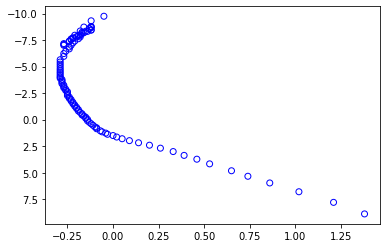

In [4]:
nova = data[data['log(Age)']==6.6]
Mv = nova['Mv']
x = nova['(B-V)o'] 
plt.gca().invert_yaxis()
plt.scatter(x,Mv, color = 'none', edgecolor = 'blue')
#plt.scatter(x, Mv,  c = x, cmap = 'bwr')
#plt.plot(x,y, '--')

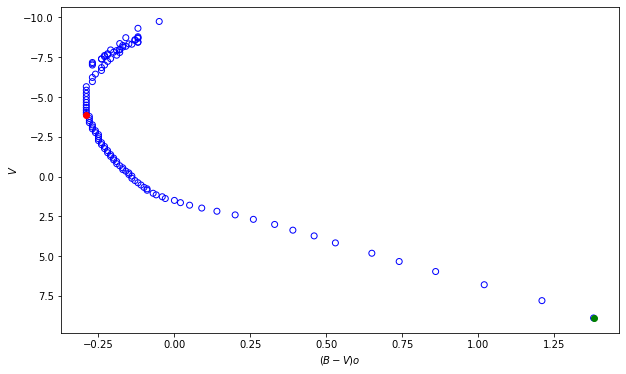

In [5]:
lx = x.tolist()
ly = Mv.tolist()

i = 0
index = 0

for element in lx:
    if i>= 1:
        if lx[i-1] - element <0:
            index = i-1
            break
    i+=1

valor = lx[index]
i = 0
for element in lx:
    if element == valor:
        index = i
        break
    i+=1

    
plt.figure(figsize=(10,6))
plt.gca().invert_yaxis()
plt.scatter(lx[index], ly[index], color = 'red', zorder = 100)
plt.scatter(x,Mv, color = 'none', edgecolor = 'blue');
plt.scatter(lx[0], ly[0], color = 'green')
plt.xlabel(r"$(B-V)o$")
plt.ylabel(r"$V$");


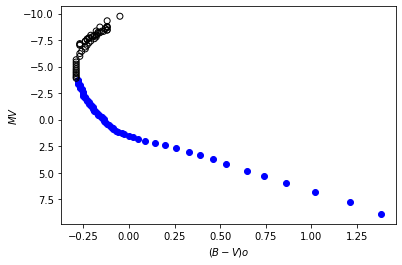

In [6]:
x1 = lx[:index]
y1 = ly[:index]
plt.gca().invert_yaxis()
plt.scatter(x1,y1, color = 'blue')
plt.scatter(lx[index:],ly[index:], color = 'none', edgecolor = 'black')
plt.xlabel(r"$(B-V)o$")
plt.ylabel(r"$MV$");

In [7]:
from scipy import stats

def linear_func(p, x):
    m, c = p
    return m*x + c

result = stats.linregress(x1,y1)
result

LinregressResult(slope=7.179665219143811, intercept=0.2672344492695206, rvalue=0.9432949557769484, pvalue=1.8427515564191363e-29, stderr=0.33175913769749055, intercept_stderr=0.1268127334650715)

In [8]:
x1 = np.asarray(x1)

t_fit = np.linspace(x1.min(),x1.max(),len(x1))
fit = linear_func([result.slope,result.intercept], t_fit) 
sigmay = np.sqrt((t_fit*result.stderr)**2 + (result.intercept_stderr)**2)


In [9]:
xadj = []
yadj = []

count = 0


ytentativa = result.slope*x1 + result.intercept

for element in y1:
    if ytentativa[count] + sigmay[count] >= element and ytentativa[count] - sigmay[count] <= element:
        xadj.append(x1[count])
        yadj.append(y1[count])
    count+=1
xadj = np.asarray(xadj)
yadj = np.asarray(yadj)


In [10]:
vrau = stats.linregress(xadj,yadj)
vrau.slope, vrau.intercept

(7.169176470588235, 0.25818274509803885)

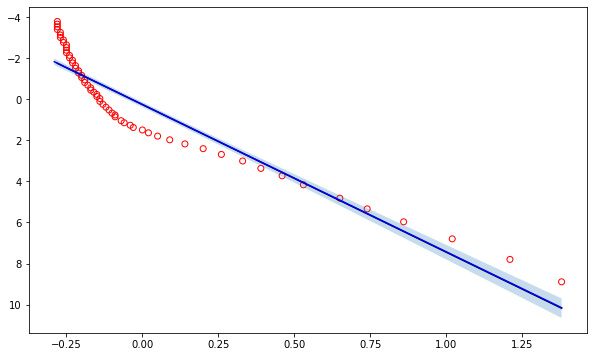

In [11]:
plt.figure(figsize=(10,6))
plt.gca().invert_yaxis()
plt.plot(x1, result.slope*x1 + result.intercept, color = 'black')
plt.scatter(x1,y1, color = 'none', edgecolor = 'red')
plt.fill_between(t_fit,fit + sigmay, fit - sigmay, alpha = 0.25)
plt.plot(t_fit,t_fit*vrau.slope + vrau.intercept, color = 'blue')

In [13]:
len(xadj),len(x)

(6, 111)